In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1655,2020-09-16,United Kingdom,373834.0,374228.0,41674.0,41664.0,-394.0,10.0
1656,2020-09-16,Germany,262659.0,263663.0,9368.0,9368.0,-1004.0,0.0
1657,2020-09-16,Iran,408174.0,407353.0,23531.0,23453.0,821.0,78.0
1658,2020-09-16,Turkey,294087.0,294620.0,7164.0,7186.0,-533.0,-22.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10091.281325301205
RMSE =  37903.97361193278


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  309.5855421686747
RMSE =  768.6819692691628


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  72965.98089171975
RMSE =  119519.7733289563
-- World performances for deaths --
MAE =  1793.6433121019109
RMSE =  2187.519136949959


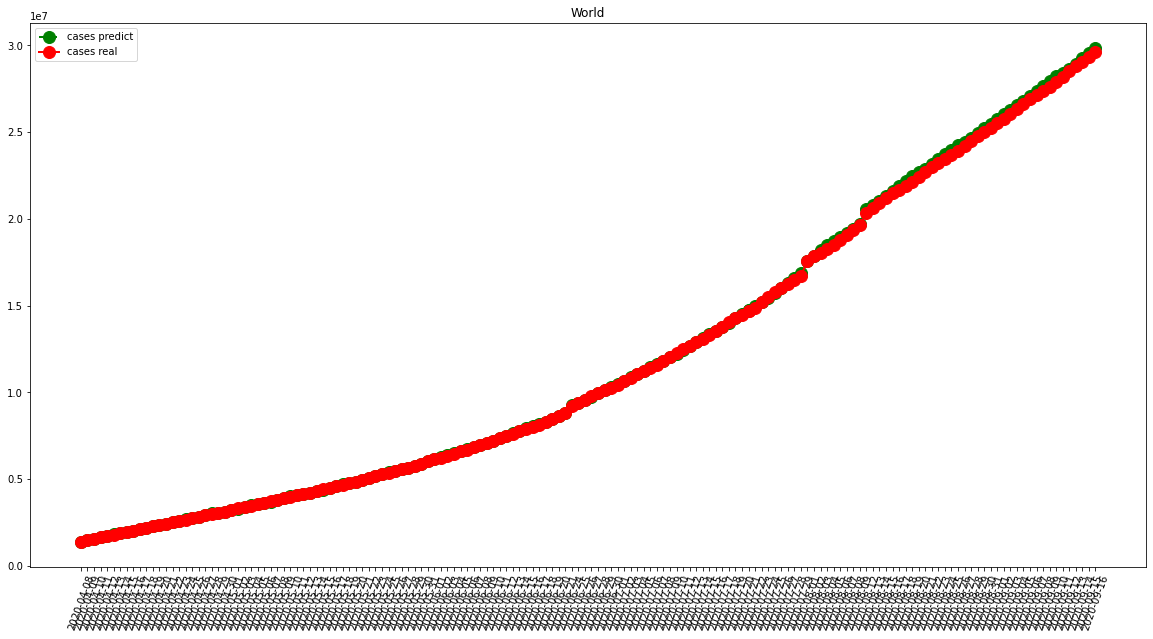

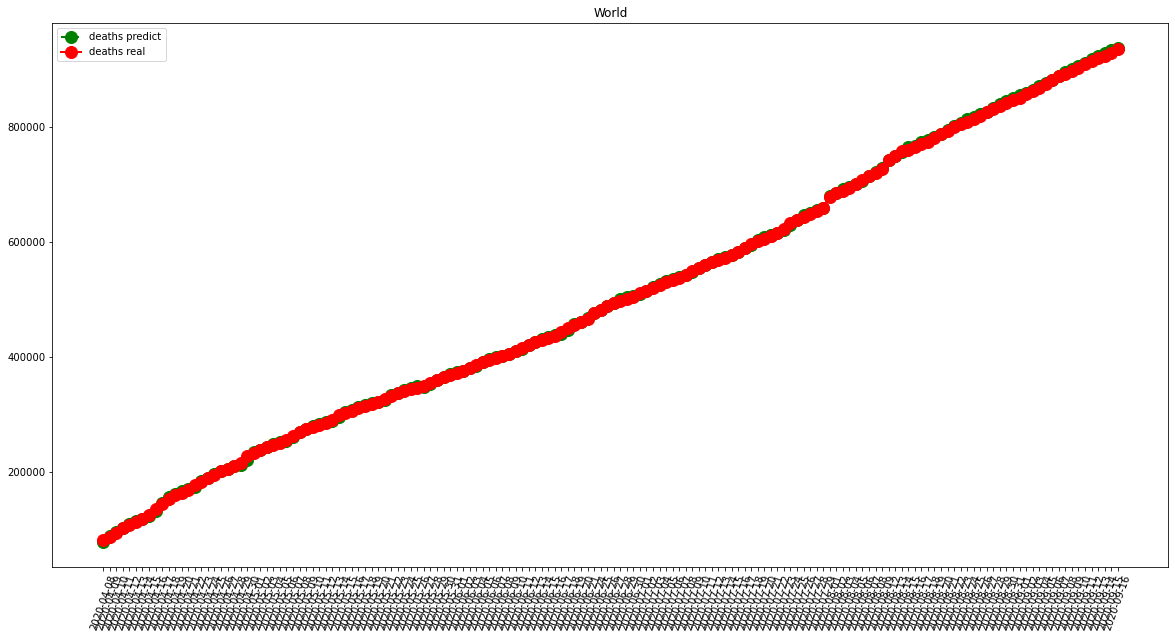

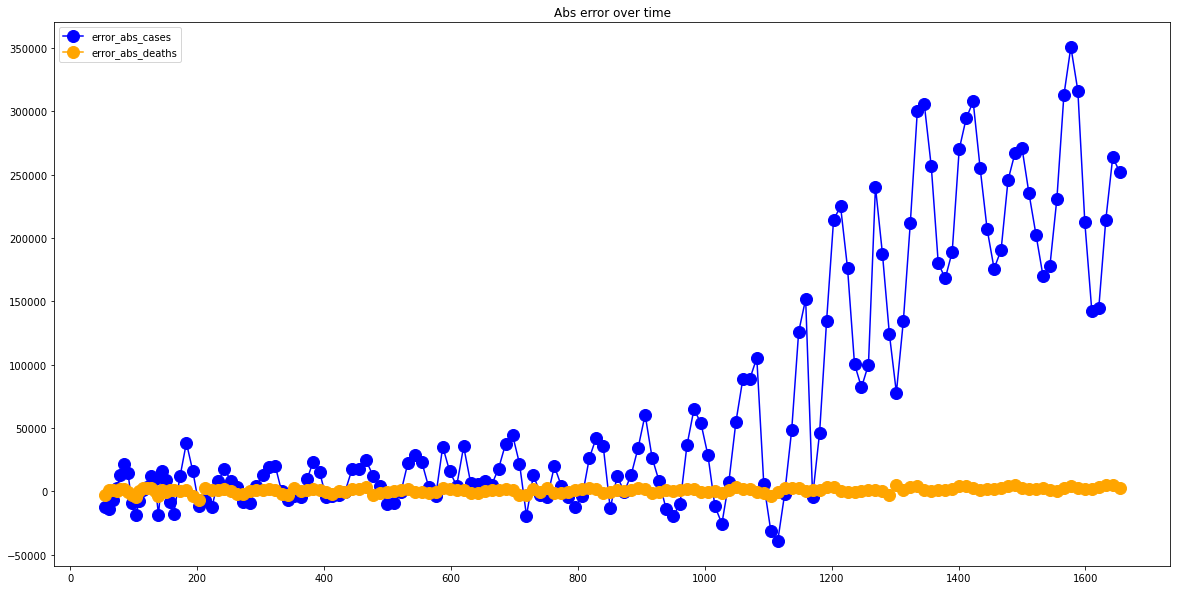

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1095.1616766467066
RMSE =  1614.9588712065156
-- France performances for deaths --
MAE =  113.79640718562874
RMSE =  259.71054823067055


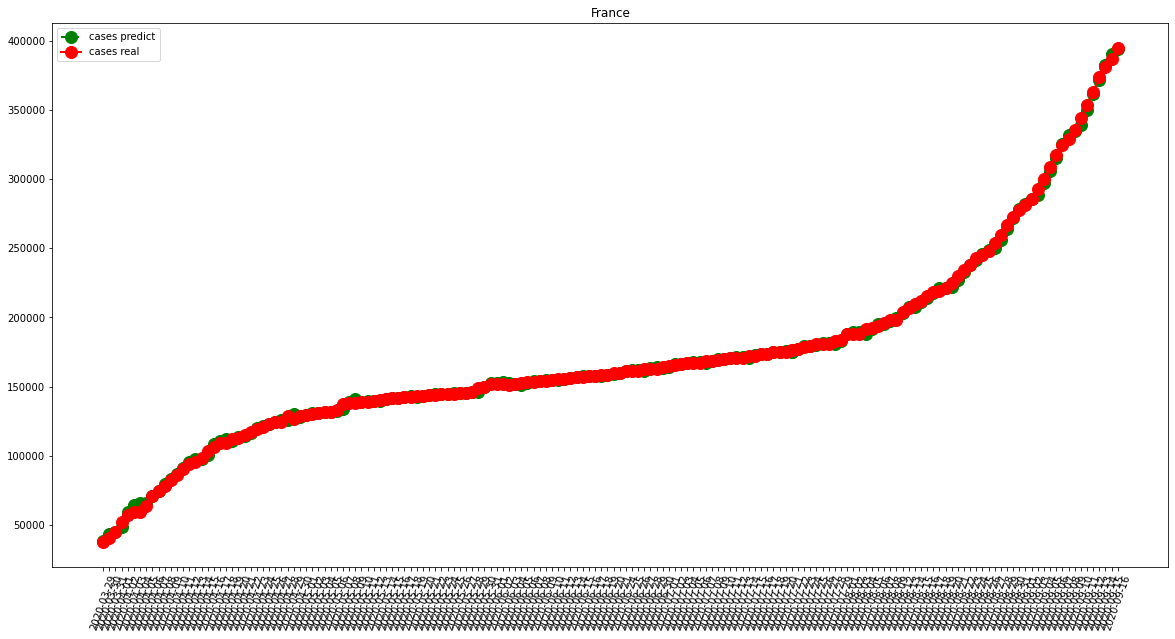

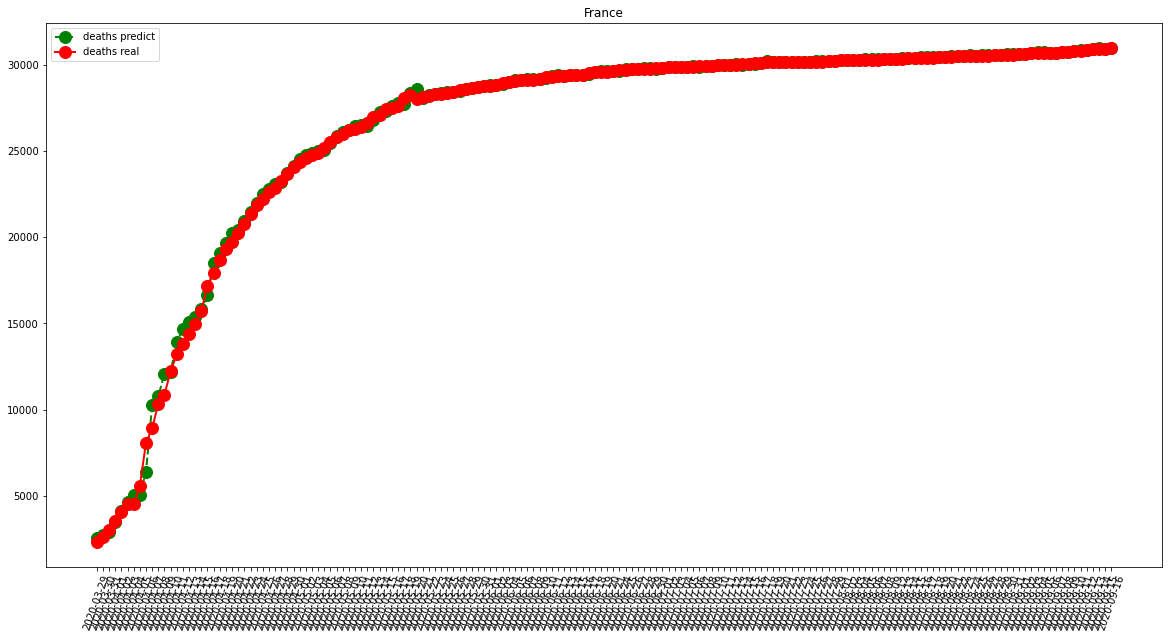

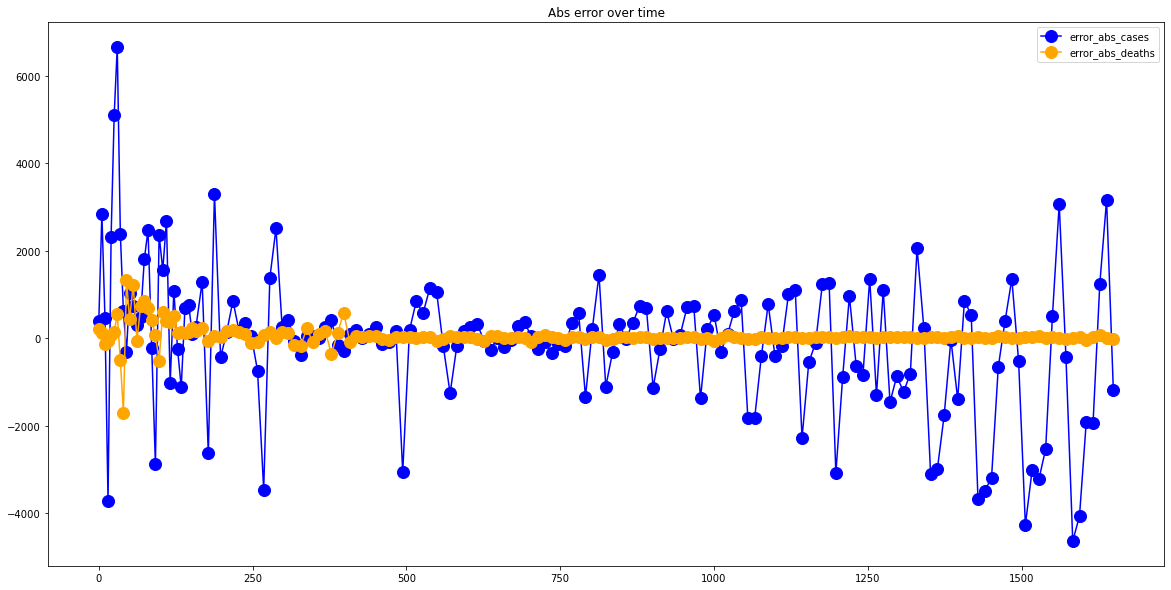

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.49101796407183
RMSE =  447.3977854696129
-- Italy performances for deaths --
MAE =  68.26347305389221
RMSE =  229.77023149537263


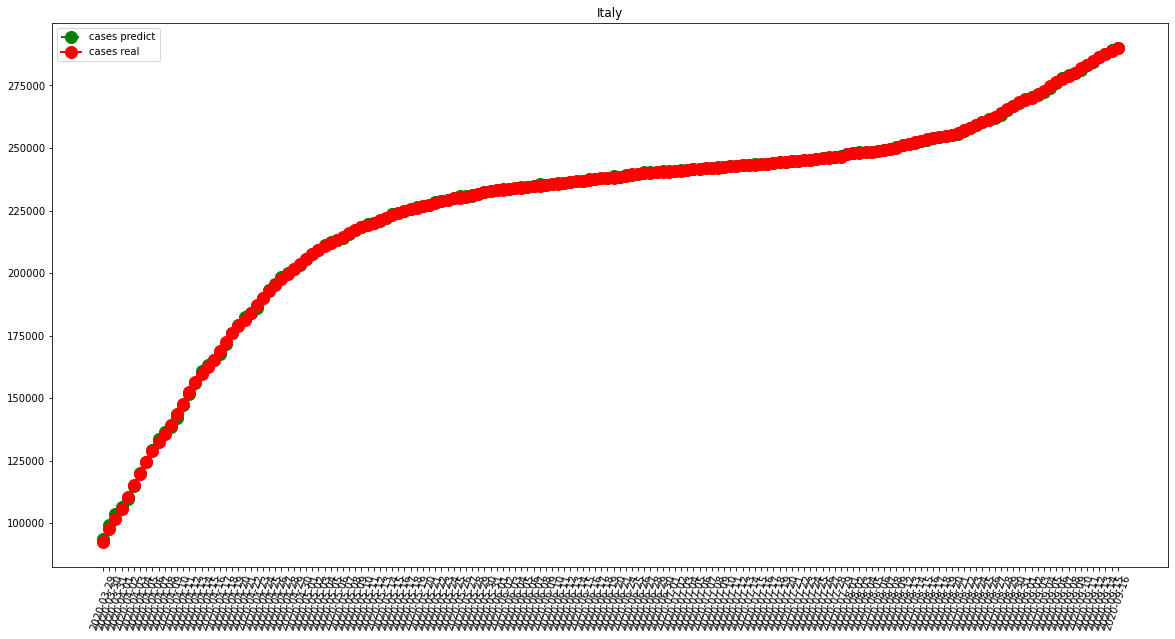

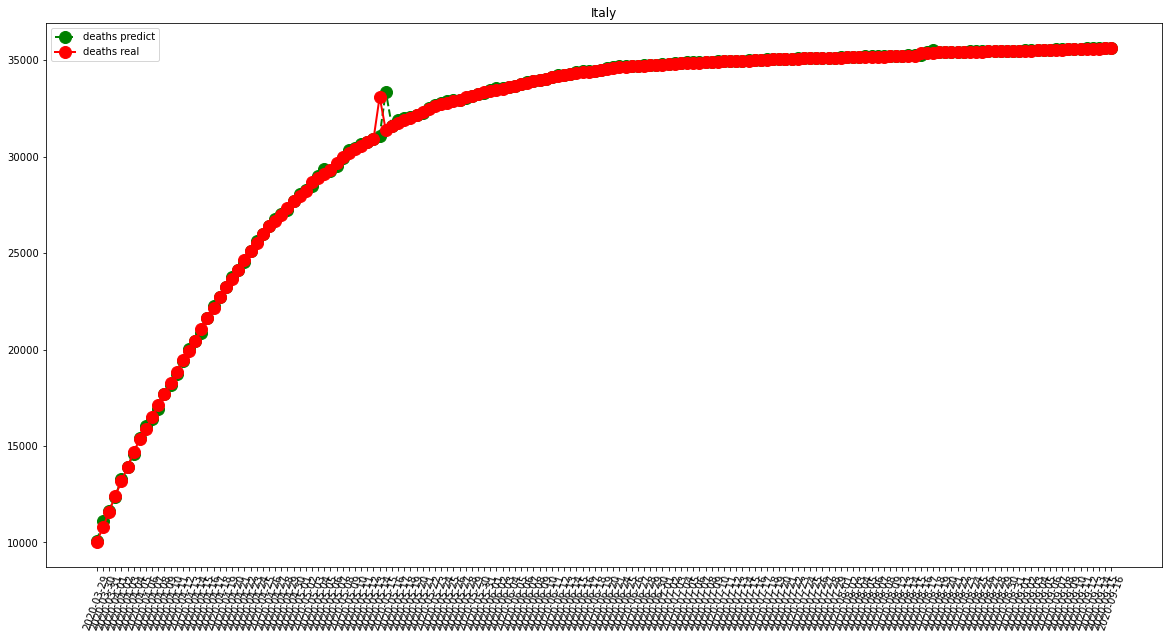

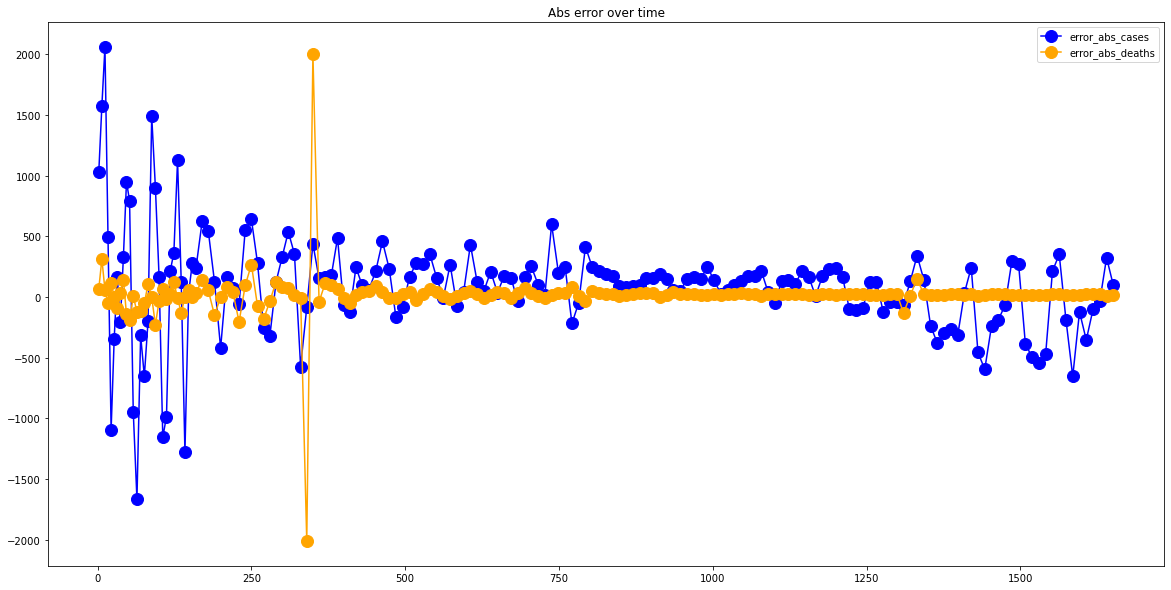

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2456.197604790419
RMSE =  4836.602665849799
-- Spain performances for deaths --
MAE =  120.88622754491018
RMSE =  315.3616496340039


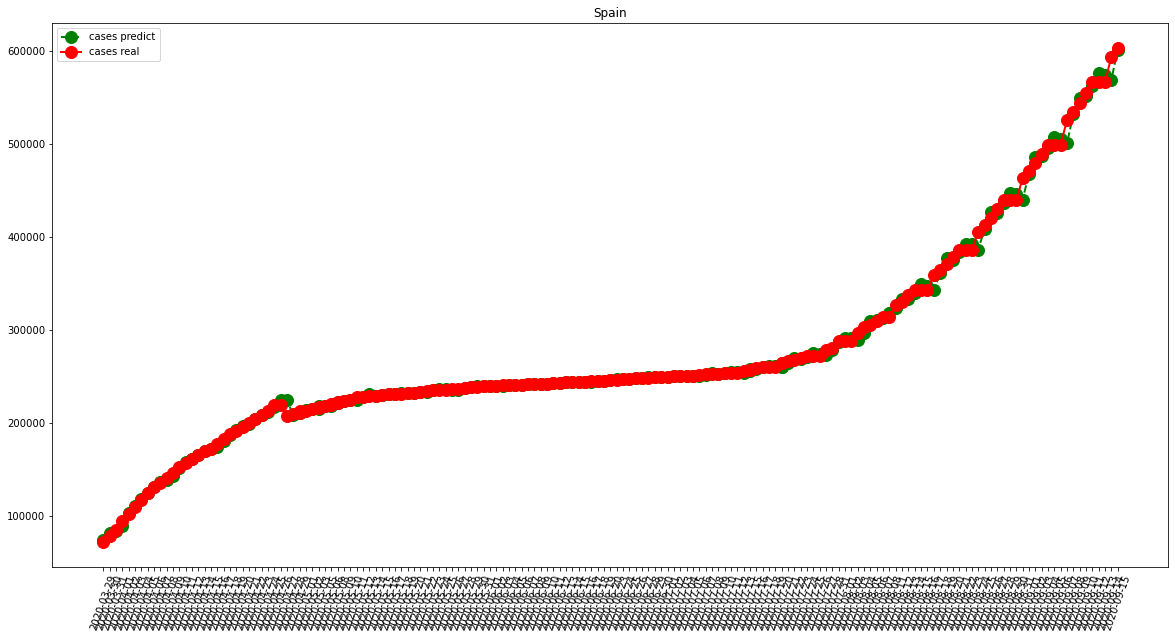

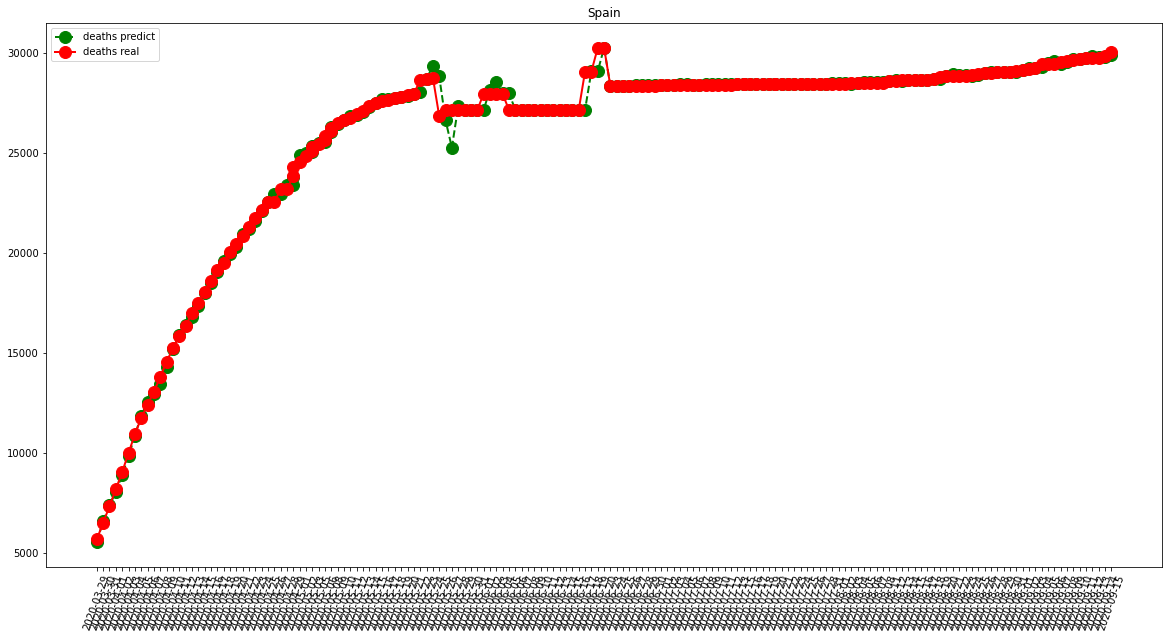

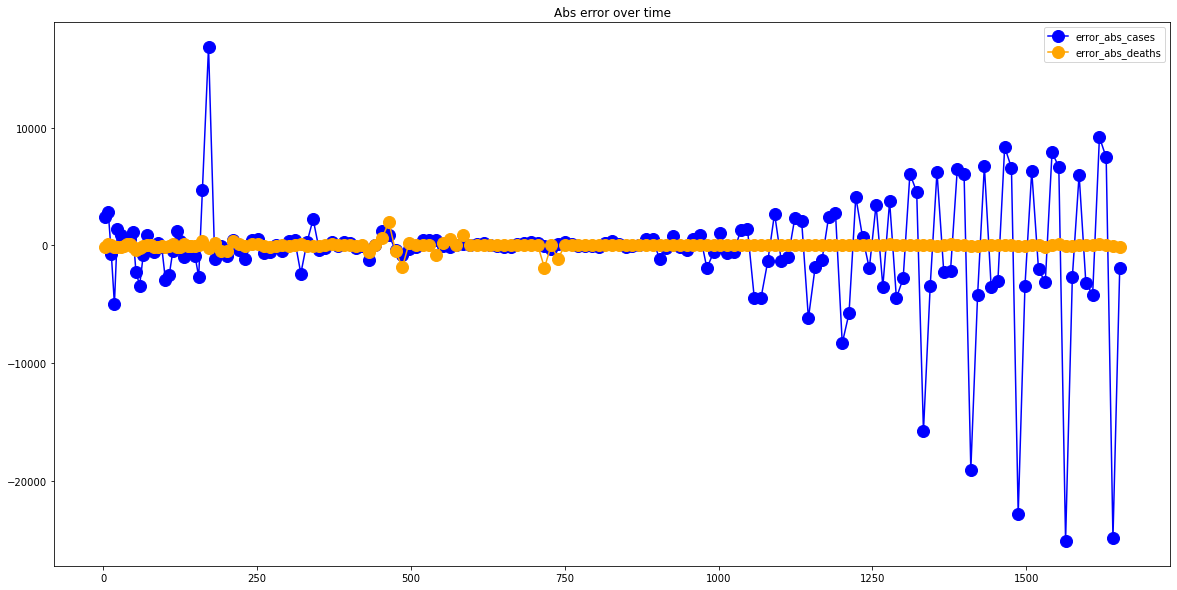

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14938.622754491018
RMSE =  22547.9896457726
-- United States performances for deaths --
MAE =  484.54491017964074
RMSE =  678.4356124493473


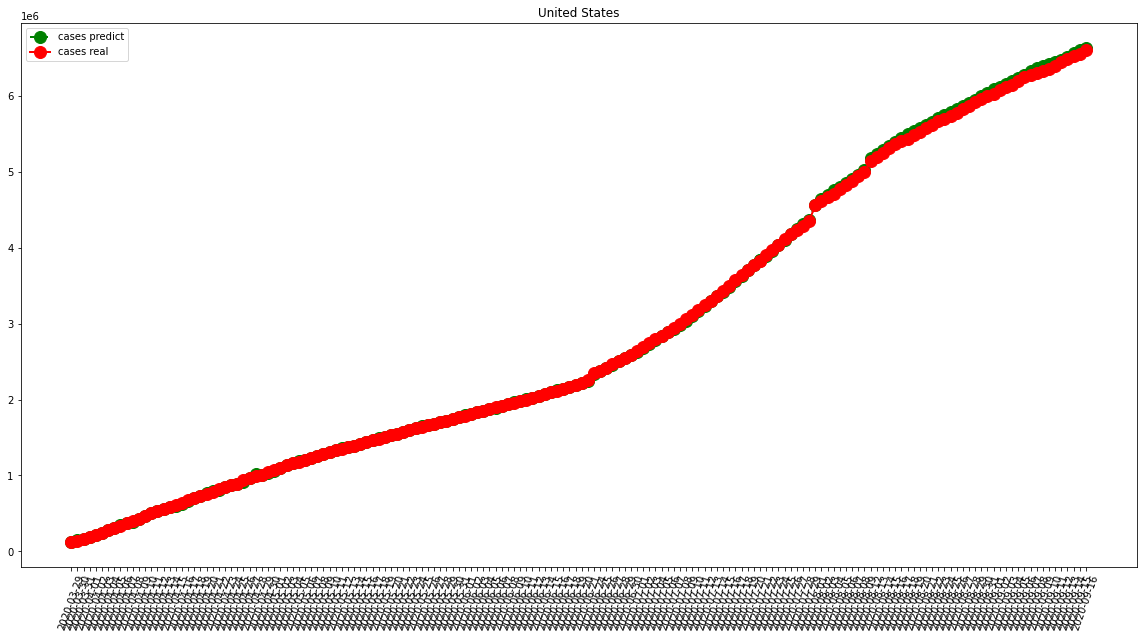

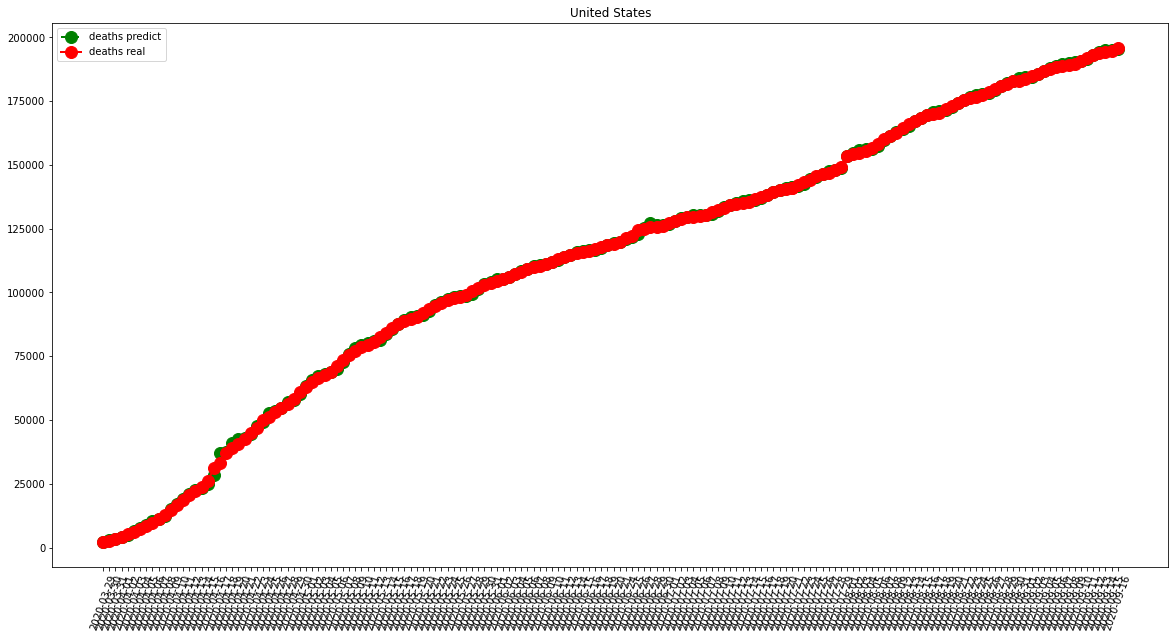

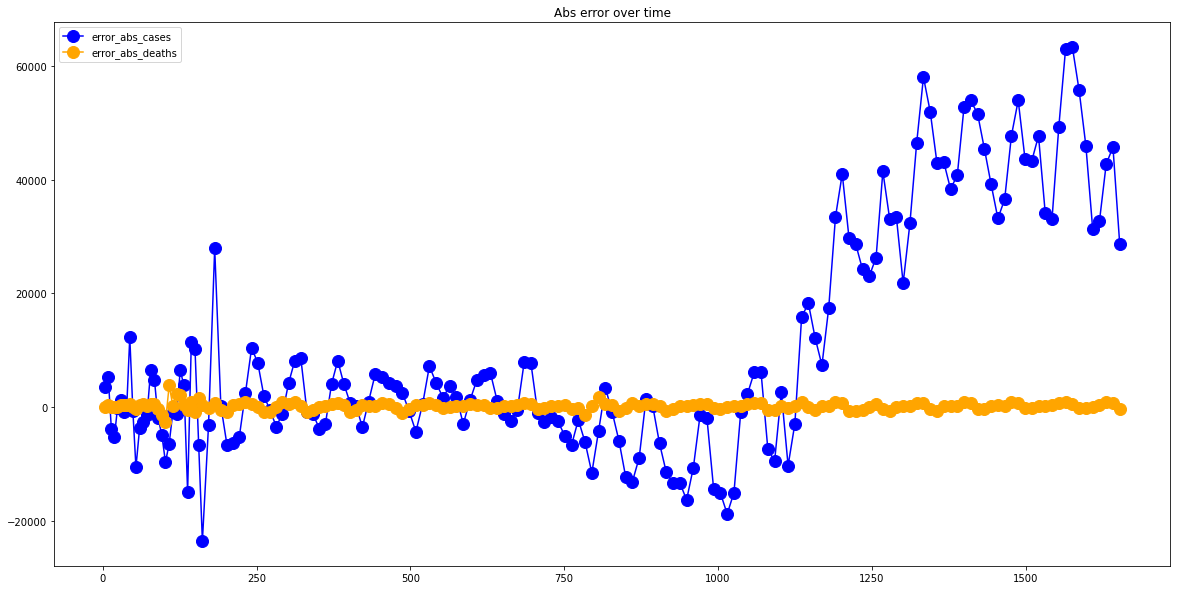

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  60.59281437125748
RMSE =  92.3697010747935
-- China performances for deaths --
MAE =  25.40119760479042
RMSE =  121.51814137253223


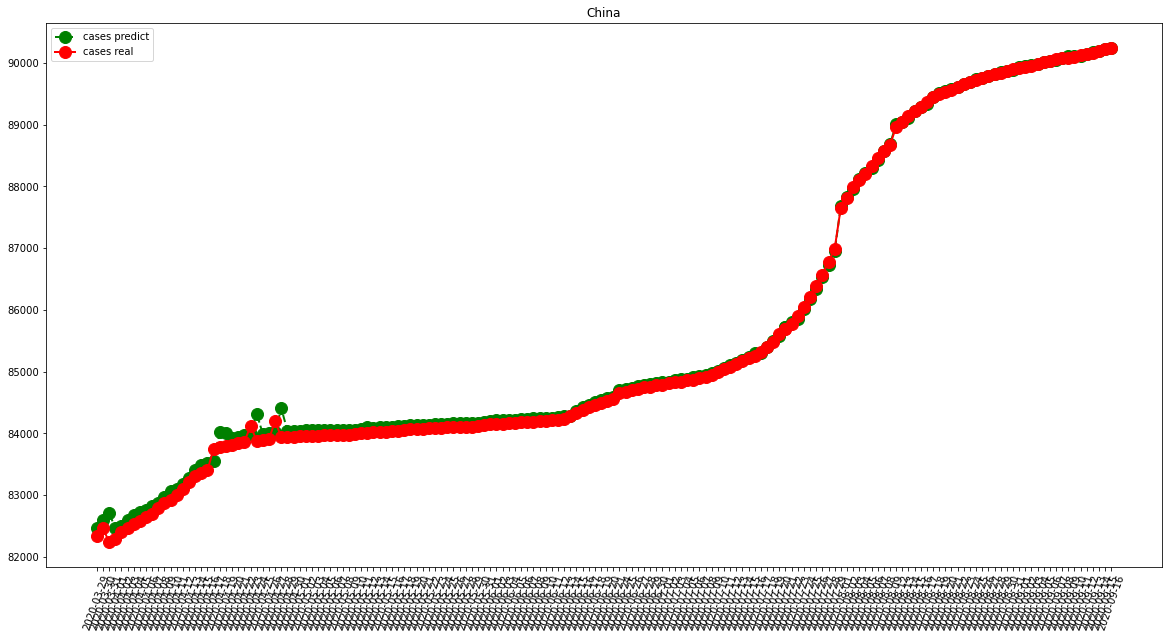

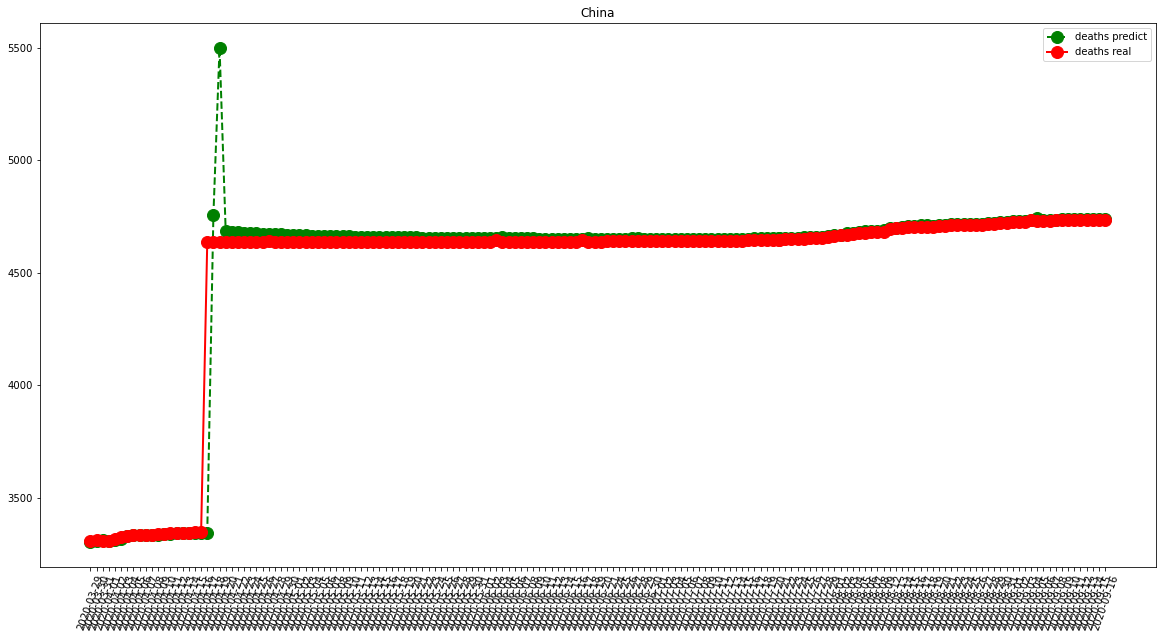

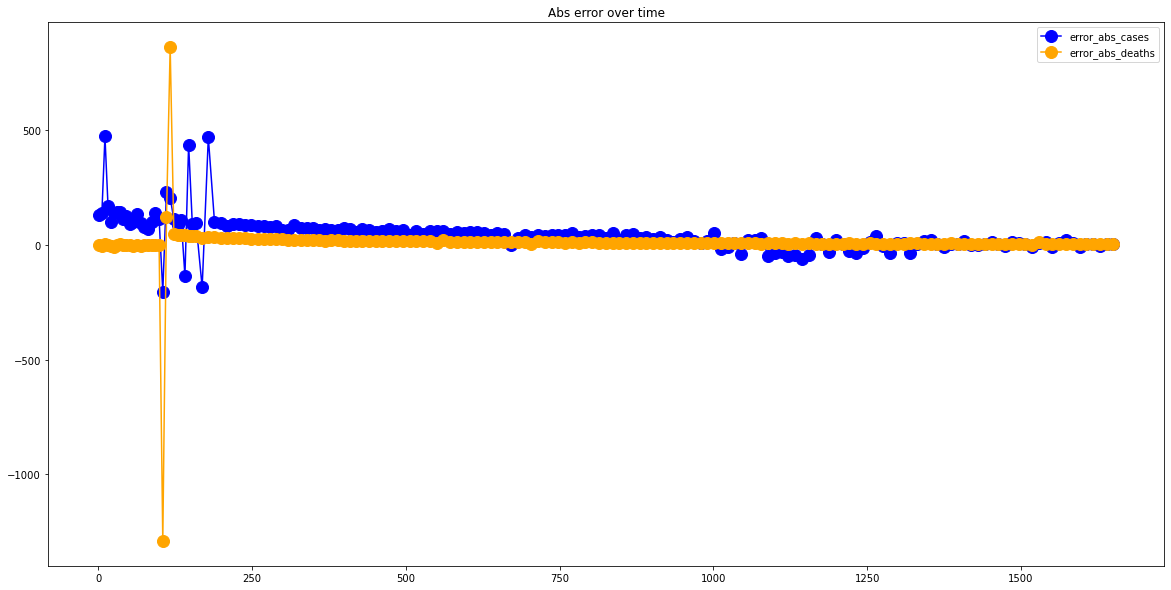

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1009.4892086330935
RMSE =  3555.288901434294
-- United Kingdom performances for deaths --
MAE =  220.84892086330936
RMSE =  723.9324166556518


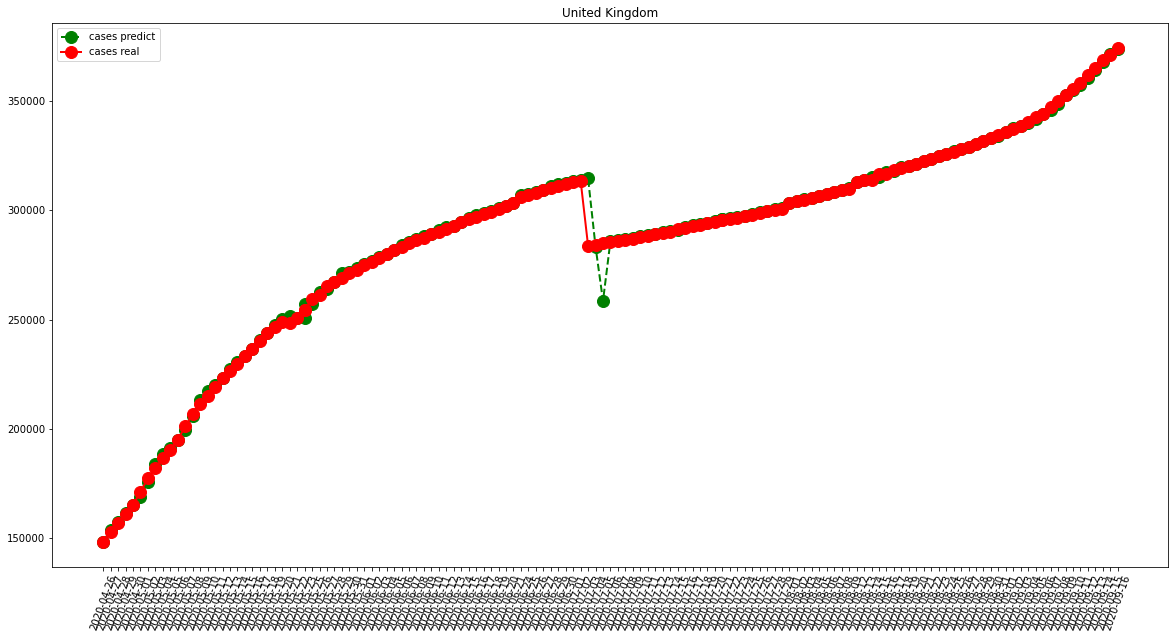

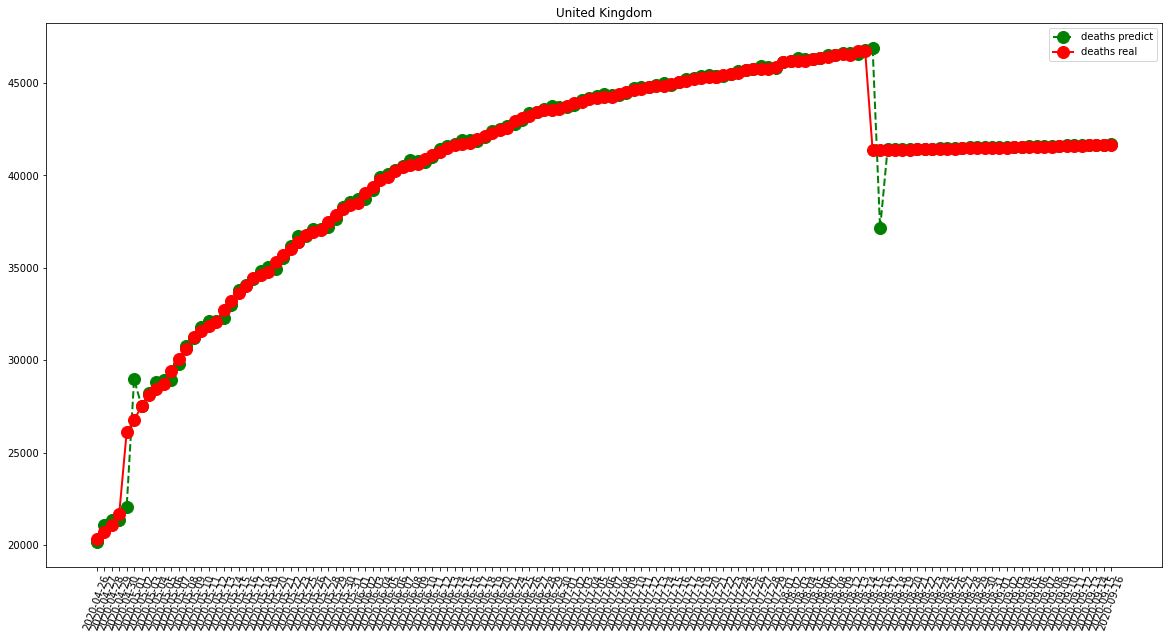

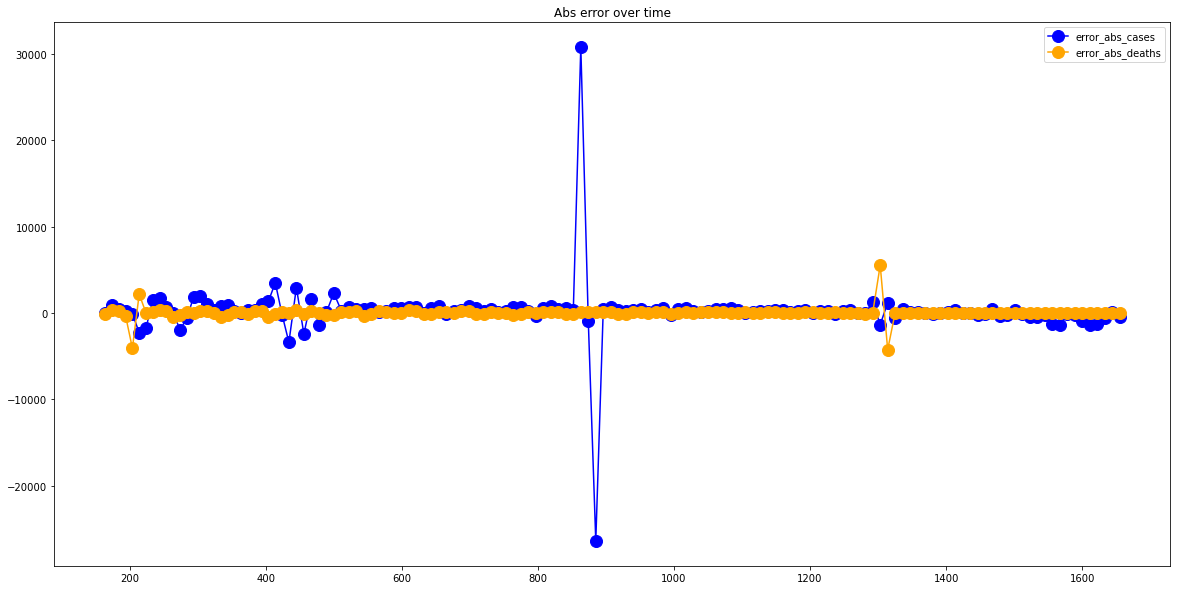

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  410.2517985611511
RMSE =  582.5456353507311
-- Germany performances for deaths --
MAE =  19.39568345323741
RMSE =  37.35172123392295


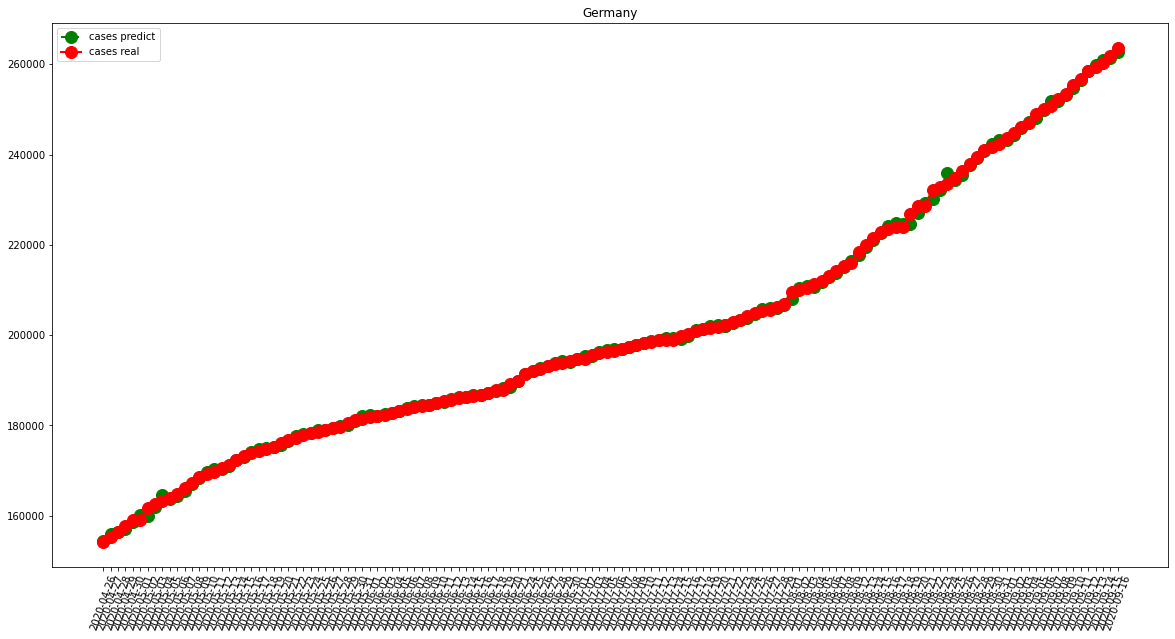

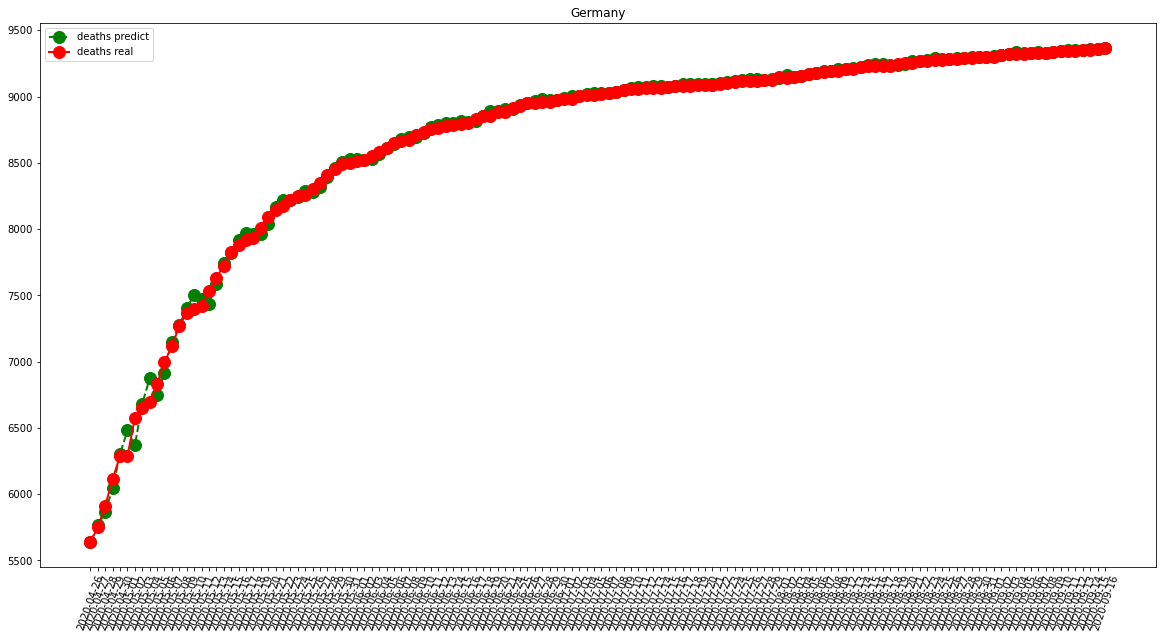

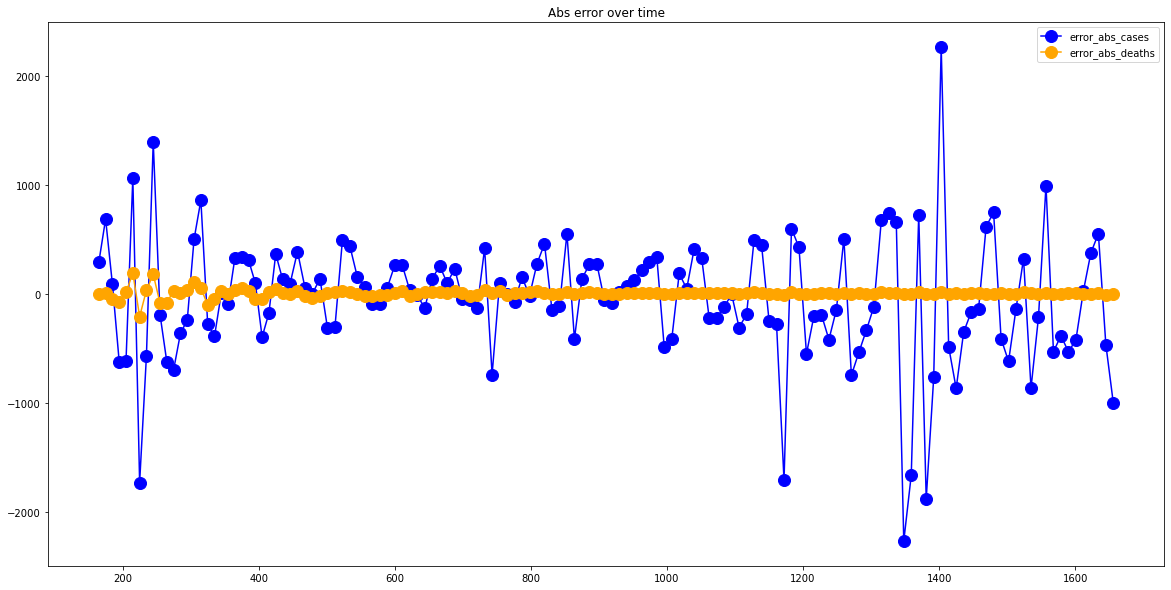

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  894.5611510791367
RMSE =  1250.0085352226586
-- Iran performances for deaths --
MAE =  52.115107913669064
RMSE =  86.4382342793034


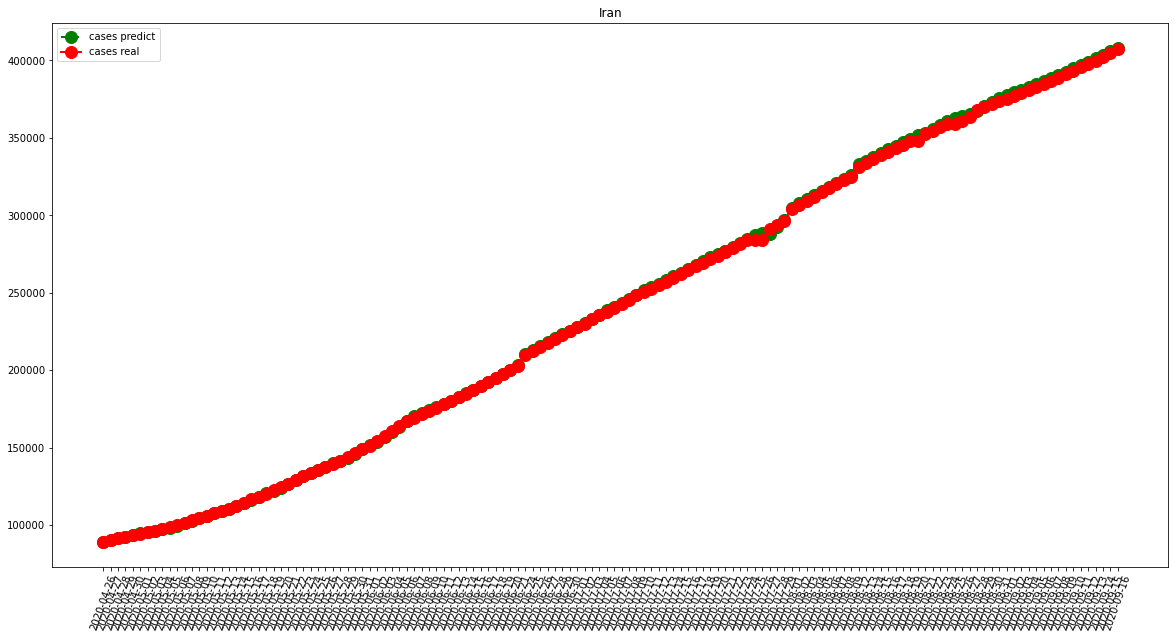

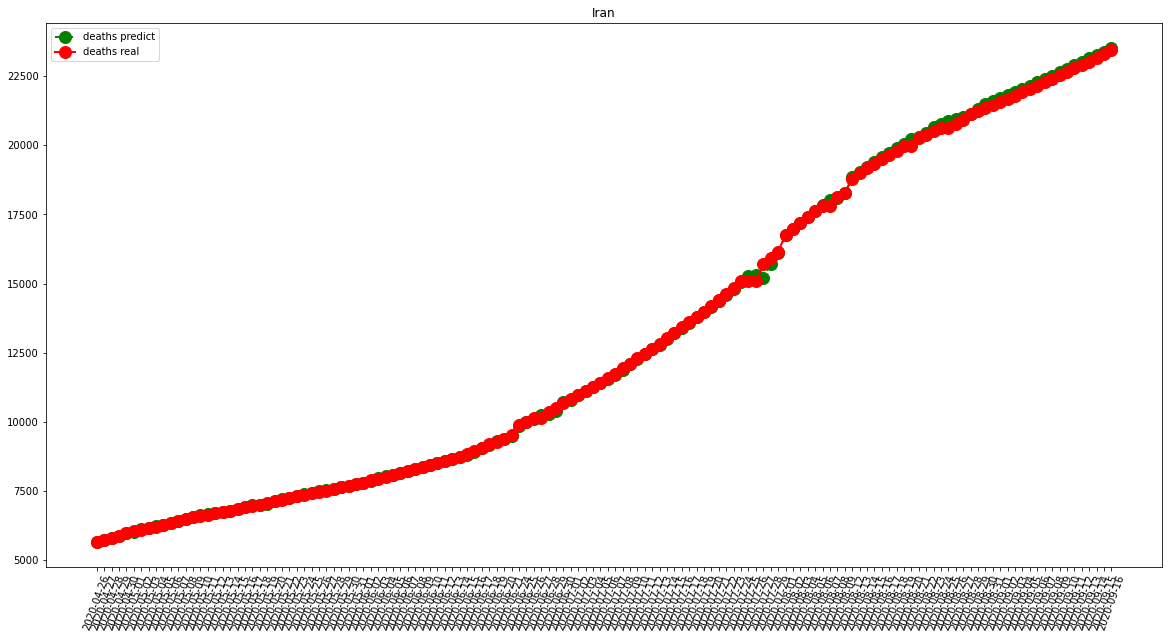

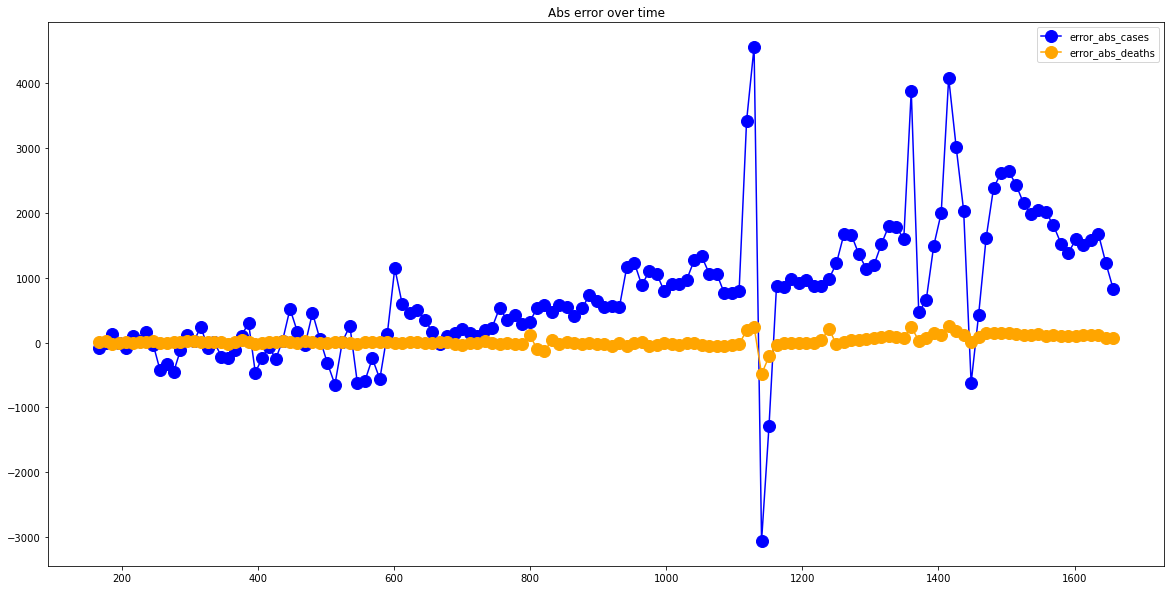

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  216.61870503597123
RMSE =  329.10163307417105
-- Turkey performances for deaths --
MAE =  16.007194244604317
RMSE =  86.28483031475488


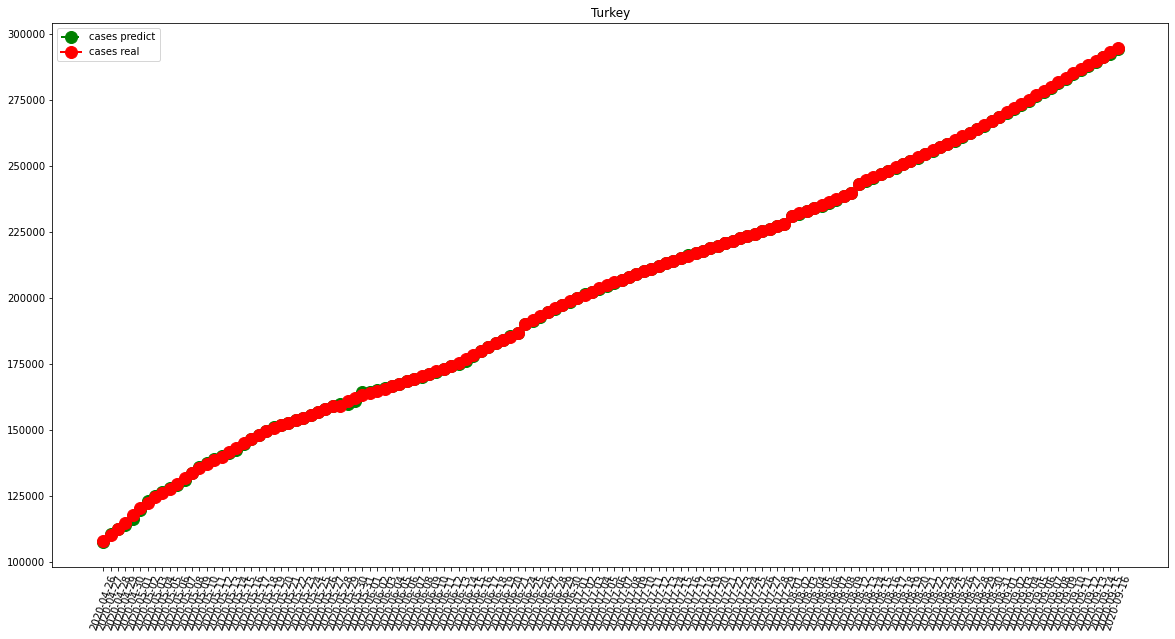

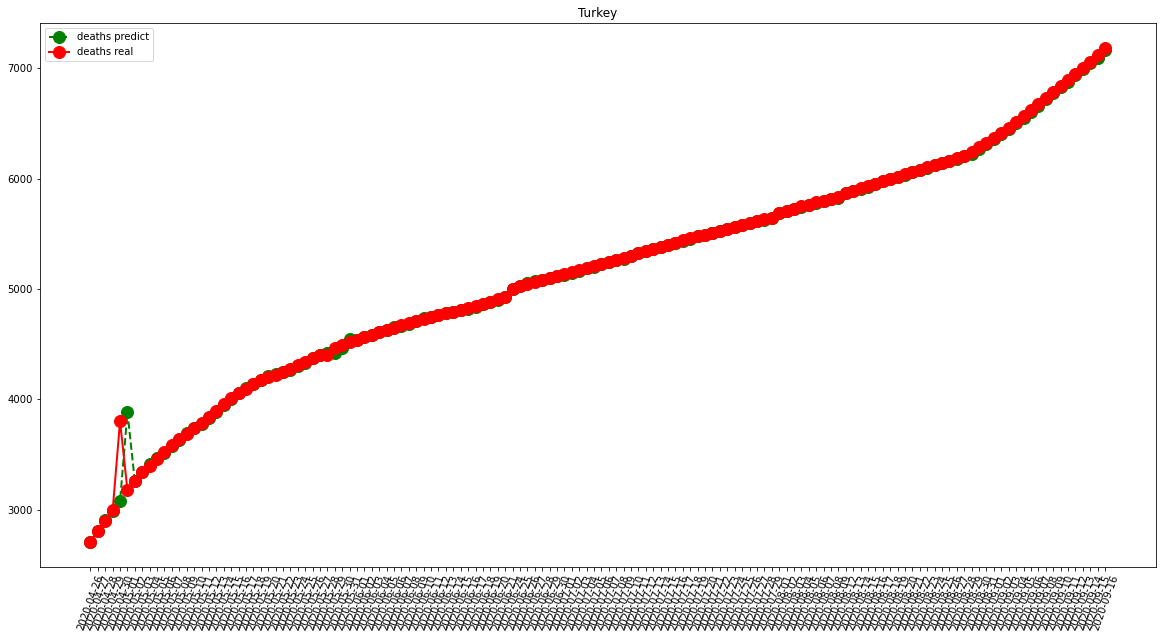

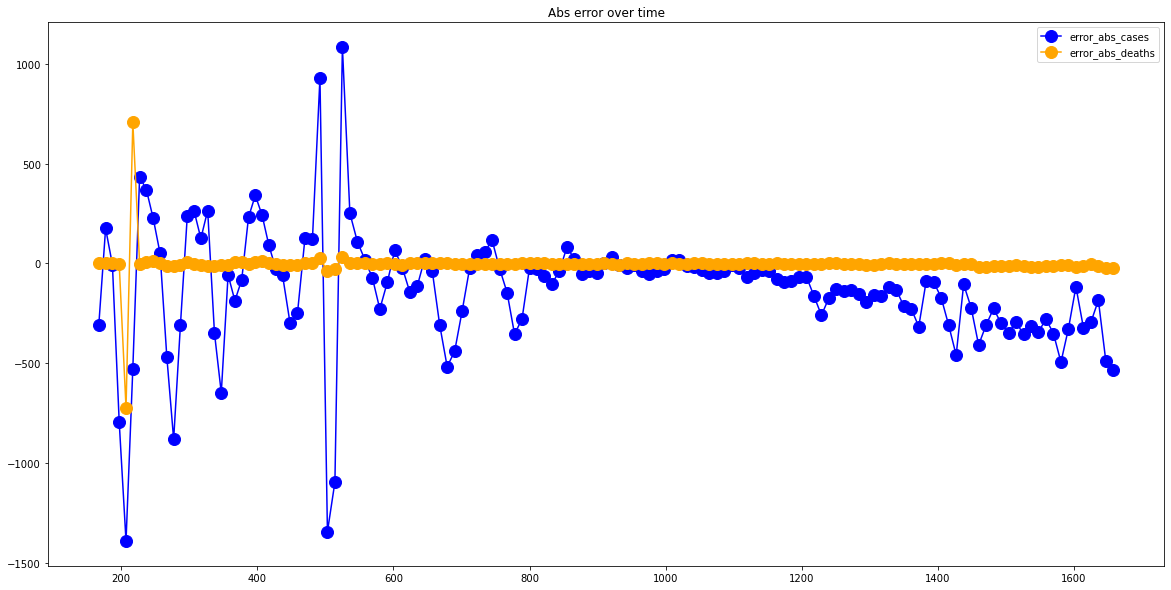

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16032.214285714286
RMSE =  21314.23043205441
-- Brazil performances for deaths --
MAE =  479.4107142857143
RMSE =  585.7631926445557


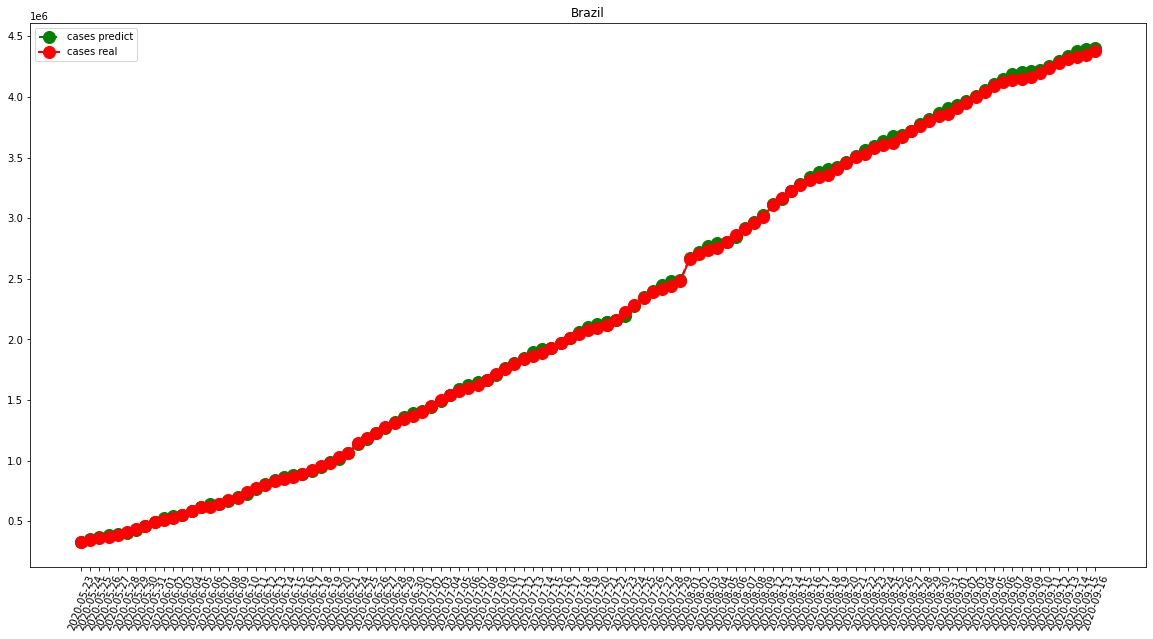

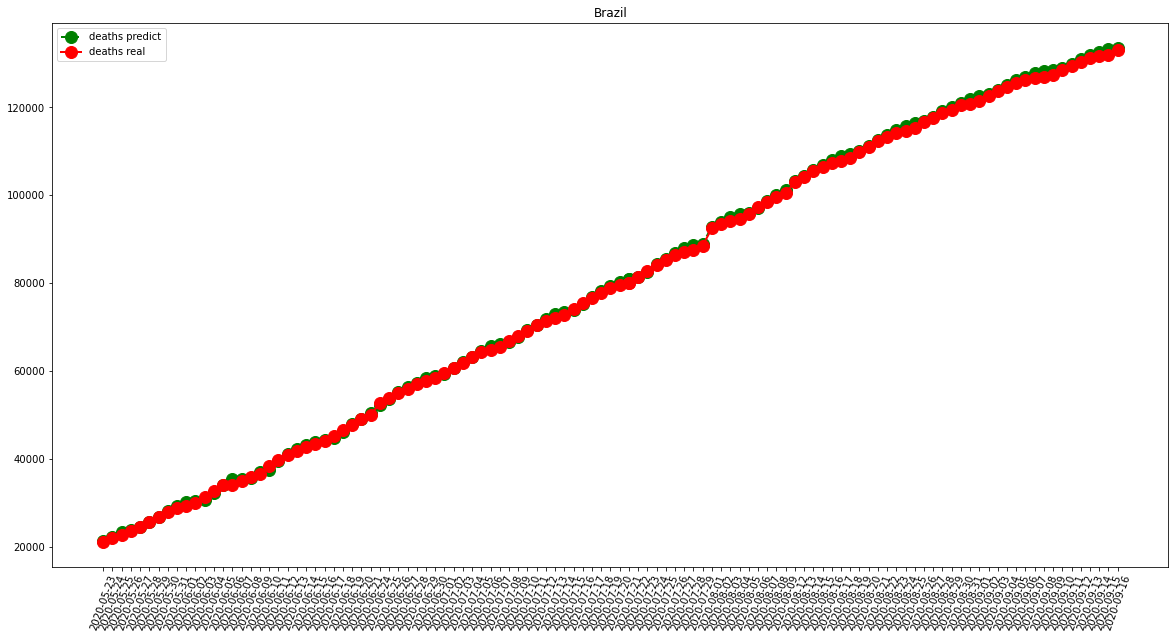

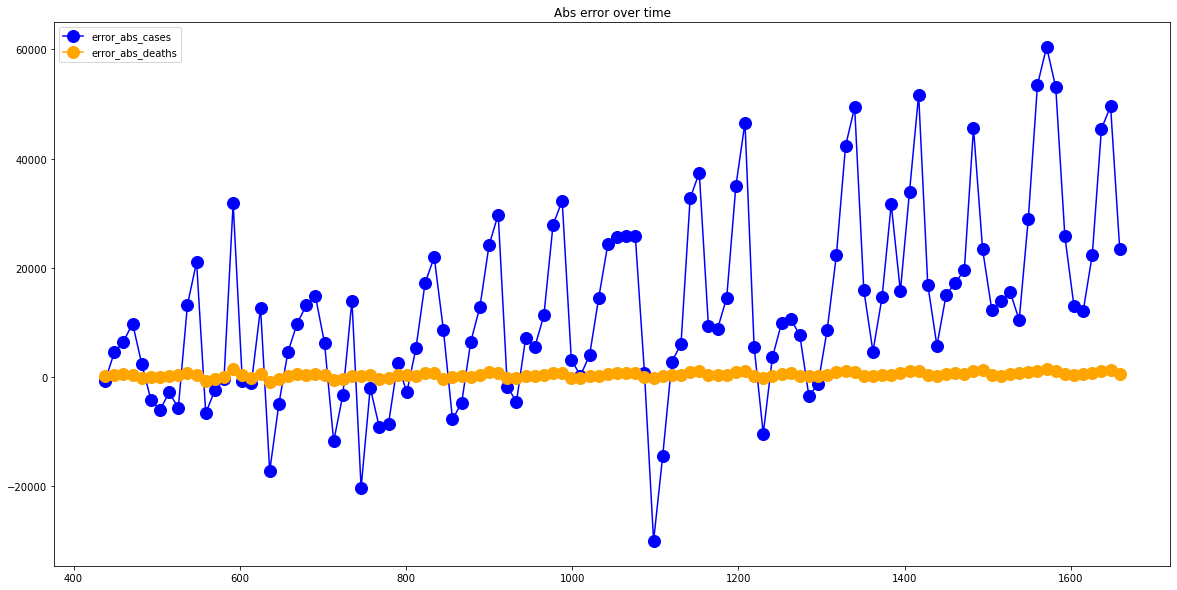

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)